In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

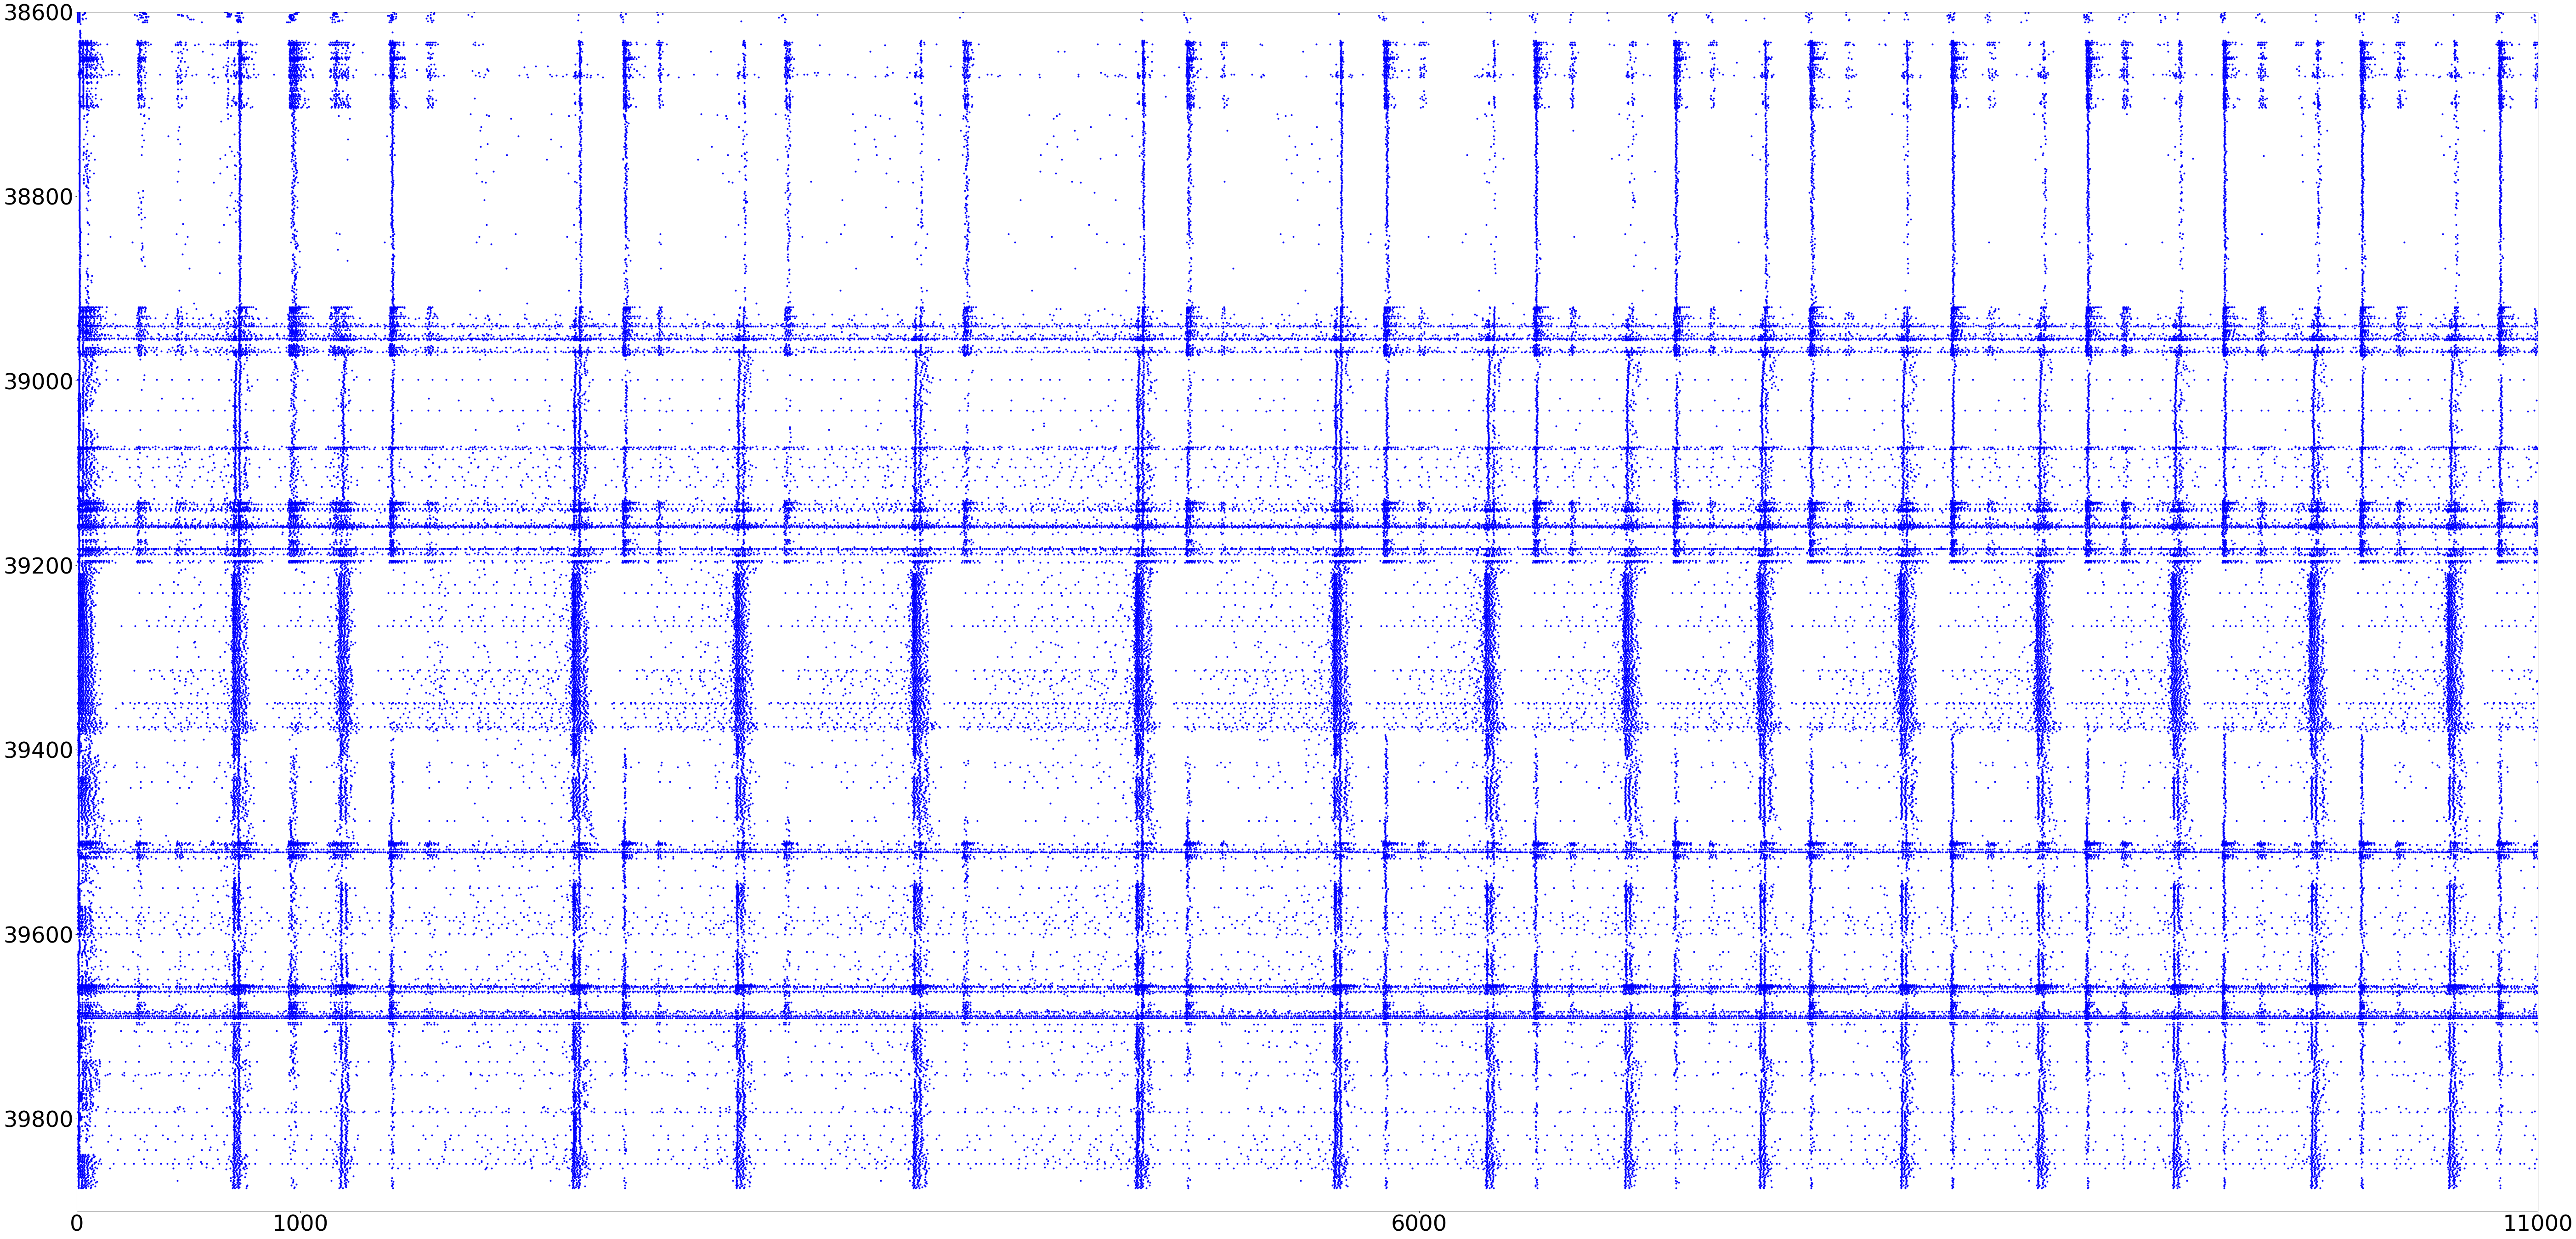

In [2]:
# #------------------------------------------------------------------------------
# # load data from S1 data file 
# #------------------------------------------------------------------------------
import pickle

#cfg.recordLFP =  [[210, y, 210] for y in [200, 1000, 1200, 1400]]
with open('../data/v8_batch4/v8_batch4_0_0_data.pkl', 'rb') as fileObj: spikesData = pickle.load(fileObj)
spkid = spikesData['simData']['spkid']
spkt = spikesData['simData']['spkt']

from matplotlib import pyplot as plt

plt.figure(figsize=(96,48))
fontSize = 48
lw = 2

plt.plot(spkt,spkid,'.b')

plt.ylim(39900,38600)
plt.xlim(0, 11000)
# plt.xlabel('Frequency [Hz]', fontsize = fontSize)
# plt.ylabel('PSD [V**2/Hz]', fontsize = fontSize)
plt.xticks([0,1000,6000,11000], fontsize = fontSize)
plt.yticks(fontsize = fontSize)
plt.show()

In [3]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl
import scipy.signal as ss


poptypeNumber = 61 # max 55 + 6
celltypeNumber = 213 # max 207 + 6

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
reducedtest = False    

#------------------------------------------------------------------------------  
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
popParam = []
cellParam = []
meParamLabels = {} 
popLabelEl = {} 
cellLabel = {}

RP_L13 = []
RP_L45 = []
RP_L6 = []

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        popLabelEl[mtype] = [] 
               
    popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])

    layernumber = float(metype[1:2])
    if cellNumber[metype]*0.01 > 1.0:
        if int(layernumber) <= 3:
            RP_L13.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        elif int(layernumber) == 6:
            RP_L6.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        else:
            RP_L45.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
    
S1pops = popParam[0:55]
S1cells = cellParam[0:207]

In [4]:
filenames = ['../data/v8_batch4/v8_batch4_%d_%d_data.pkl' % (iseed, cseed) for iseed in [0] for cseed in [0]]
timeRange = [2000, 10000]

allData = []

for filename in filenames:
    sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)


    # standardd plots
    # sim.analysis.plotRaster(**{'include': ['allCells'], 'saveFig': True, 'showFig': False, 'labels': False, 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotRaster(**{'include': RP_L13, 'saveFig': filename[:-4]+'_RP_L13', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotRaster(**{'include': RP_L45, 'saveFig': filename[:-4]+'_RP_L45', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotRaster(**{'include': RP_L6, 'saveFig': filename[:-4]+'_RP_L6', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotSpikeStats(stats=['rate'],figSize = (6,12), timeRange=[1500, 31500], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_30sec')
    #sim.analysis.plotSpikeStats(stats=['rate'],figSize = (6,12), timeRange=[1500, 6500], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_5sec')
    #sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': ['avg', [0], [1], [2,3,4,5,6,7,8,9], [10, 11, 12], [13], [14, 15], [16,17,18,19]], 'timeRange': timeRange, 'maxFreq': 50, 'figSize': (8,24), 'saveData': False, 'saveFig': filename[:-4]+'_LFP_spec_7s_all_elecs', 'showFig': False})
#     sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': 
#             [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
#             'timeRange': timeRange, 
#             'figSize': (12,6), 'saveFig': True, 'showFig': False})

#     out = sim.analysis.plotLFP(**{'plots': ['spectrogram'], 
#             'electrodes': 
#             [8], #'avg', 
#             'timeRange': timeRange, 
#             'maxFreq': 400, 
#             'figSize': (16,12), 
#             'saveData': False, 
#             'saveFig': True, 'showFig': False})

#     sim.analysis.plotLFP(**{'plots': ['PSD'], 
#             'electrodes': 
#             [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
#             'timeRange': timeRange, 
#             'maxFreq': 400, 
#             'figSize': (5,5), 
#             'saveData': False, 
#             'saveFig': True, 'showFig': False})

    # out = sim.analysis.plotLFP(**{'plots': ['locations'], 
    #         'figSize': (48,48), 
    #         'saveData': False, 
    #         'saveFig': filename[:-4]+'_locations_3layers', 'showFig': False, 'dpi': 300})


Start time:  2022-04-25 22:57:13.680747
Loading file ../data/v8_batch4/v8_batch4_0_0_data.pkl ... 
  Done; file loading time = 15.32 s
Loading simConfig...
Loading netParams...
Loading net...
  Created 39876 cells
  Created 0 connections
  Created 12640 stims
  Done; re-instantiate net time = 87.30 s
Loading simData...
Recording 0 traces of 0 types on node 0


In [66]:
# sim.analysis.plot2Dnet(**{'include':spikesData['net']['pops'].keys(), 'popColors': color0, 'view': 'xy','saveFig': False, 'showConns': False, 'fontSize':1, 'figSize':(5, 25)});

Plotting 2D representation of network cell locations and connections...


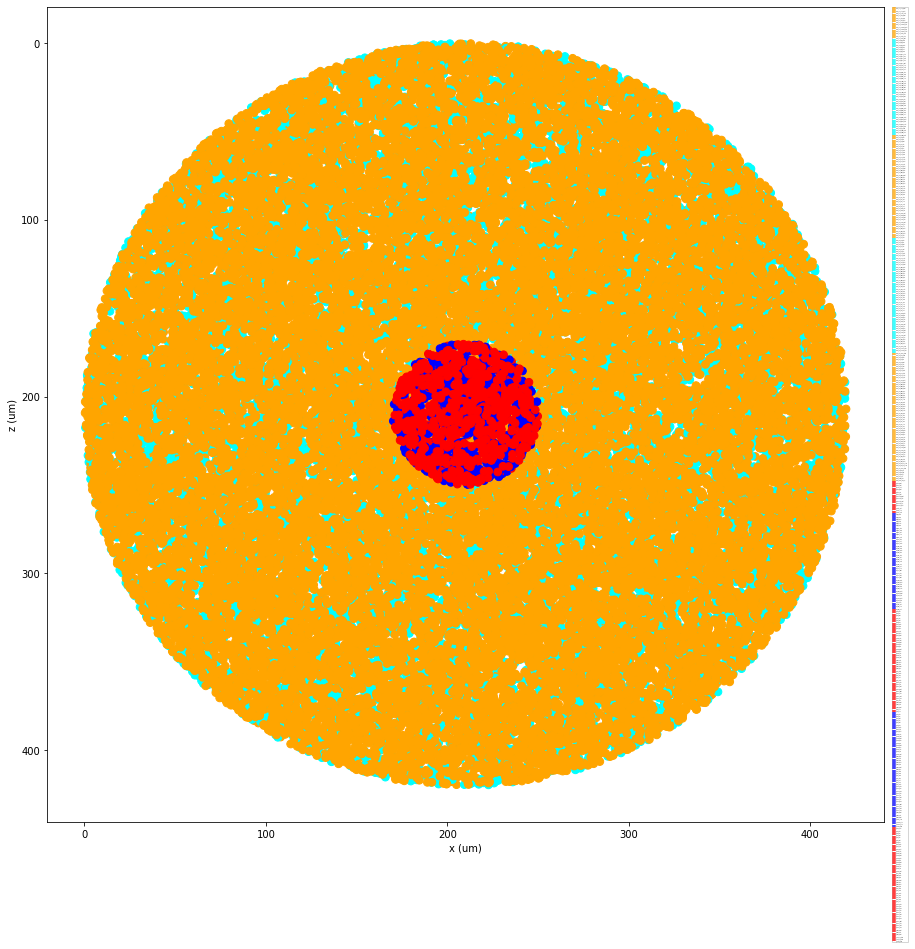

In [5]:
color0 = {}

for metype in spikesData['net']['pops'].keys():
    if 'L' == metype[0]:
        if '2' == metype[1] or '5' == metype[1]:
            color0[metype]= 'blue'
        else:
            color0[metype]= 'red'
    else:
        if 'n_L23_' in metype or 'n_L5_' in metype:
            color0[metype]= 'cyan'
        else:
            color0[metype]= 'orange'

# sim.analysis.plot2Dnet(**{'include':spikesData['net']['pops'].keys(), 'popColors': color0, 'saveFig': False, 'showConns': False, 'fontSize':8, 'figSize':(8, 40)});
sim.analysis.plot2Dnet(**{'include':spikesData['net']['pops'].keys(), 'popColors': color0, 'view': 'xz','saveFig': False, 'showConns': False, 'fontSize':1, 'figSize':(15, 15)});

In [6]:
[[210, y, 210] for y in [200, 1000, 1200, 1400]] # 4 elec in the center

[[210, 200, 210], [210, 1000, 210], [210, 1200, 210], [210, 1400, 210]]

Plotting LFP ...


([<Figure size 2592x864 with 1 Axes>],
 {'LFP': array([[ 0.        ,  0.        ,  0.        ,  0.        ],
         [-0.00010782, -0.00209486, -0.00223899, -0.00322273],
         [ 0.0001168 , -0.00099975, -0.00293163, -0.00408195],
         ...,
         [-0.00620549, -0.05119438, -0.06797446, -0.0066465 ],
         [ 0.00232758, -0.05004538, -0.06574121, -0.00622741],
         [-0.00140667, -0.05160271, -0.06564874, -0.00780162]]),
  'electrodes': [0, 1, 2, 3],
  'timeRange': [0, 11000],
  'saveData': None,
  'saveFig': True,
  'showFig': False,
  't': array([0.00000e+00, 1.00000e-01, 2.00000e-01, ..., 1.09997e+04,
         1.09998e+04, 1.09999e+04])})

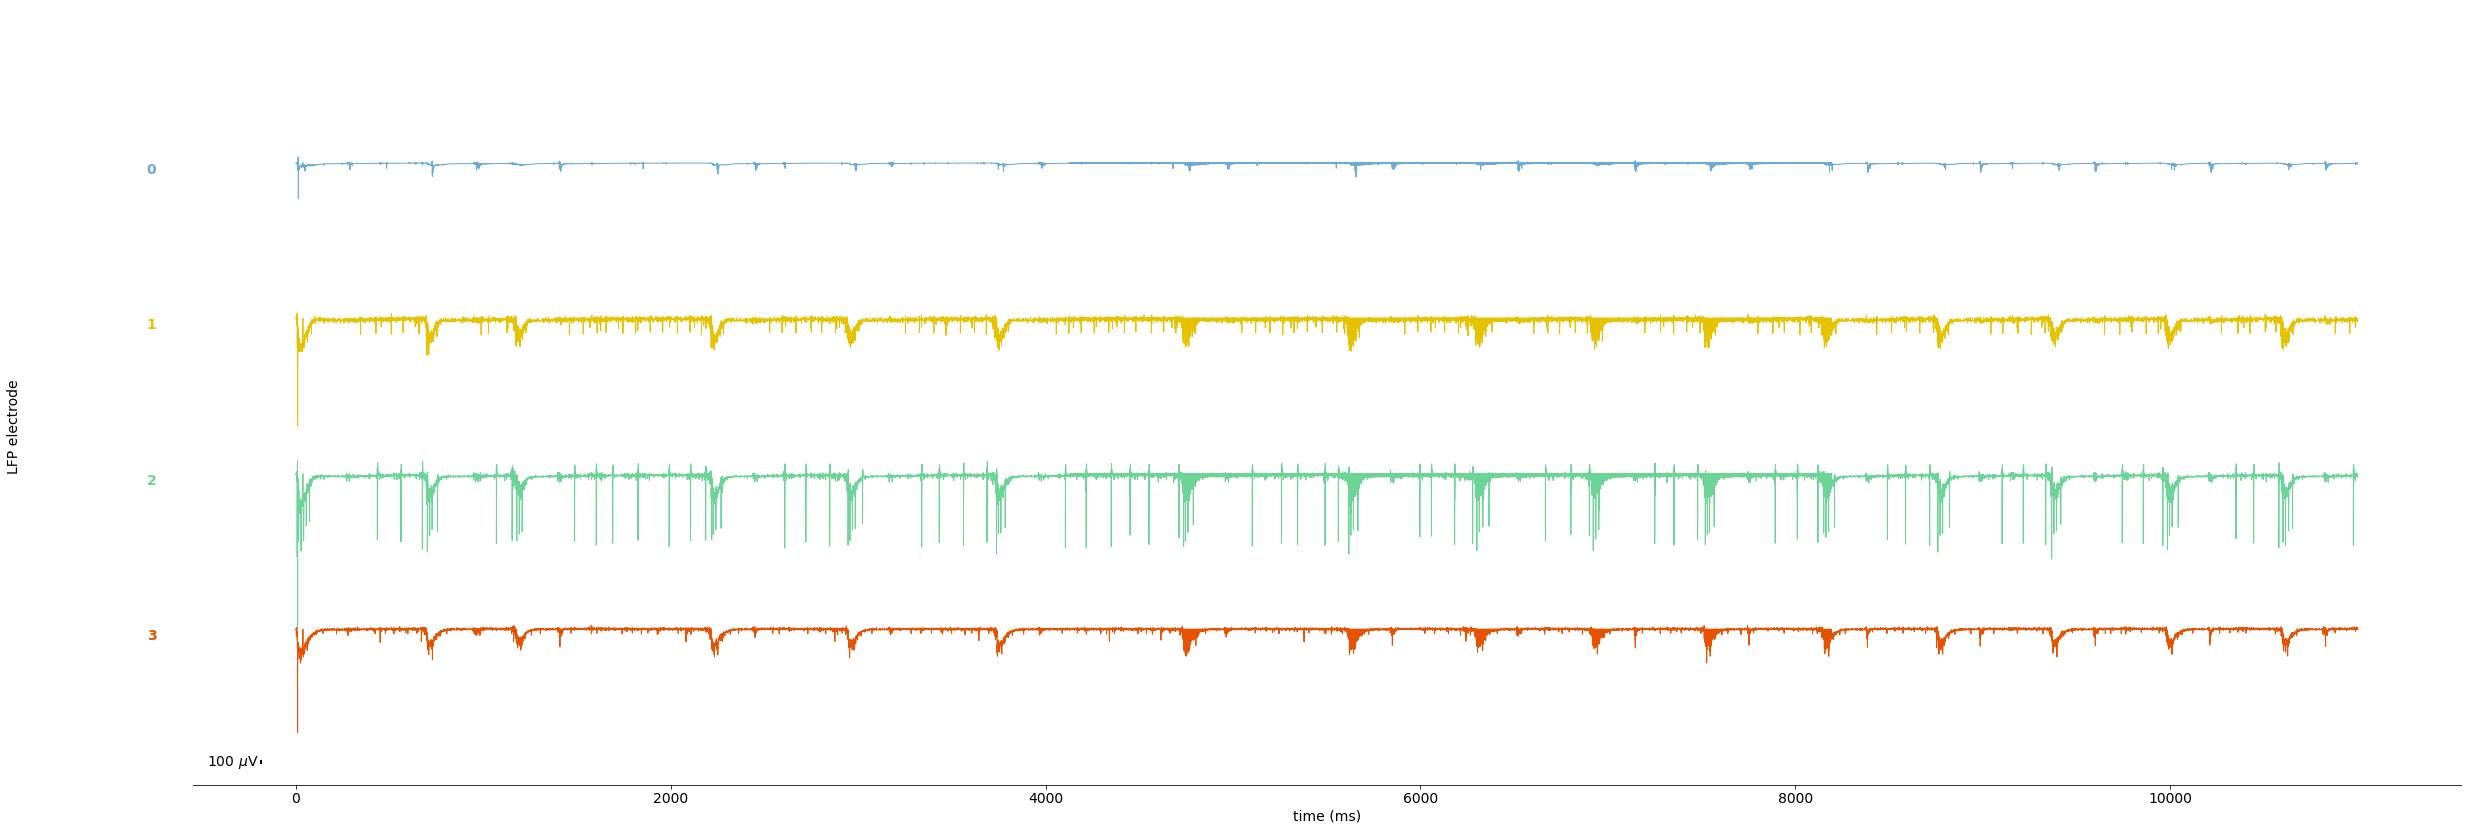

In [7]:
sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': ['all'],
#         [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
        'timeRange': [0,11000], 
        'figSize': (36,12), 'saveFig': True, 'showFig': False})

Plotting LFP ...
Plotting LFP ...
Plotting LFP ...
Plotting LFP ...


([<Figure size 864x144 with 1 Axes>],
 {'LFP': array([[-0.05718444, -0.09546876, -0.0992087 , -0.02954398],
         [-0.05622619, -0.09298509, -0.10083548, -0.02986404],
         [-0.05484316, -0.08741116, -0.10109806, -0.02922687],
         ...,
         [-0.00620549, -0.05119438, -0.06797446, -0.0066465 ],
         [ 0.00232758, -0.05004538, -0.06574121, -0.00622741],
         [-0.00140667, -0.05160271, -0.06564874, -0.00780162]]),
  'electrodes': [3],
  'timeRange': [9000, 11000],
  'saveData': None,
  'saveFig': True,
  'showFig': False,
  't': array([ 9000.        ,  9000.1       ,  9000.2       , ...,
         10999.70000001, 10999.80000001, 10999.90000001])})

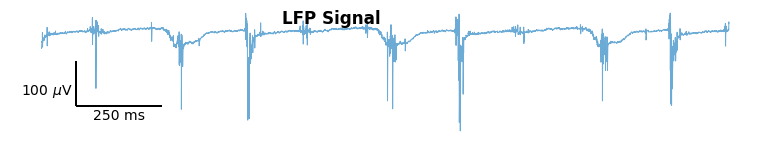

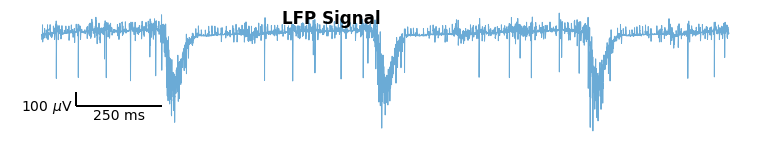

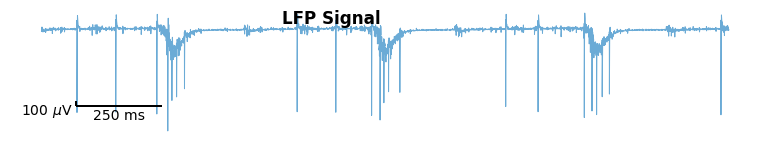

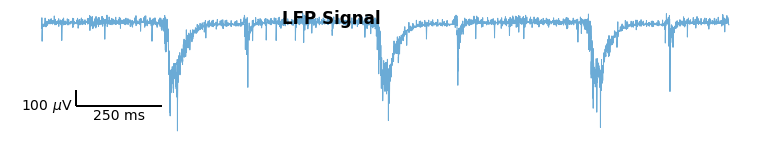

In [8]:
sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': [0],
#         [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
        'timeRange': [9000,11000], 
        'figSize': (12,2), 'saveFig': True, 'showFig': False})
sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': [1],
#         [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
        'timeRange': [9000,11000], 
        'figSize': (12,2), 'saveFig': True, 'showFig': False})
sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': [2],
#         [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
        'timeRange': [9000,11000], 
        'figSize': (12,2), 'saveFig': True, 'showFig': False})
sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': [3],
#         [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
        'timeRange': [9000,11000], 
        'figSize': (12,2), 'saveFig': True, 'showFig': False})

Plotting LFP ...


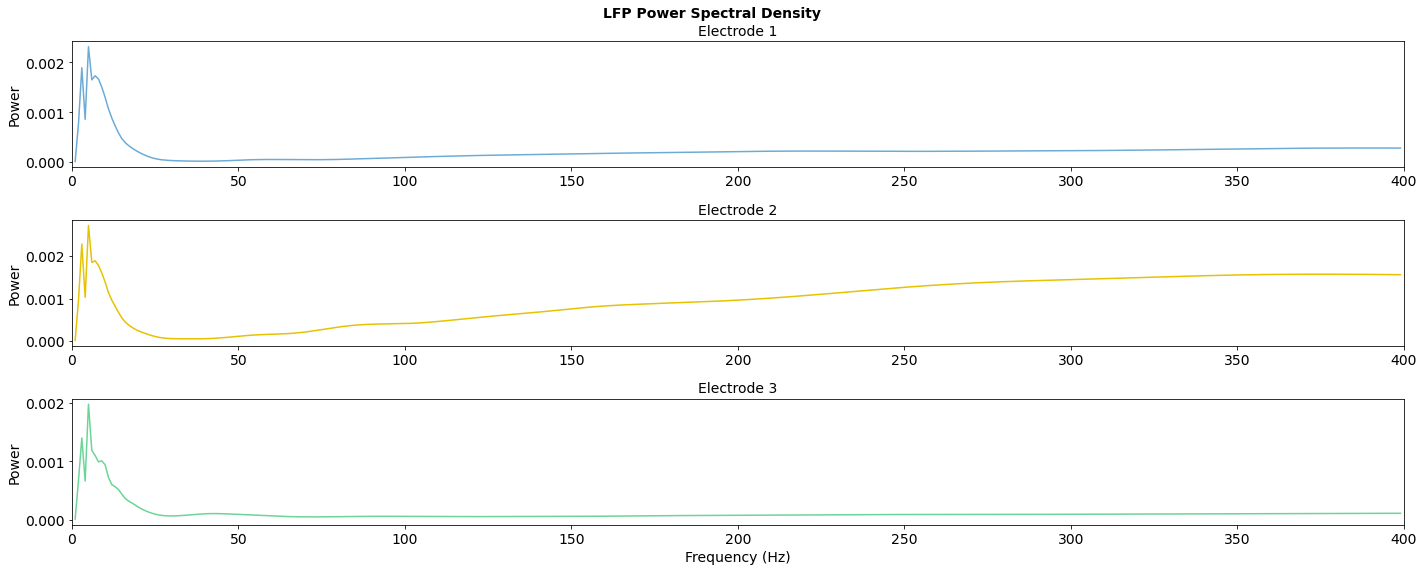

In [9]:
sim.analysis.plotLFP(**{'plots': ['PSD'], 
            'electrodes': [1,2,3], #'avg', 
            'timeRange': [6000,11000], 
            'maxFreq': 400, 
            'figSize': (20,8), 
            'saveData': False, 
            'saveFig': True, 'showFig': False});

Plotting LFP ...
Plotting LFP ...
Plotting LFP ...
Plotting LFP ...


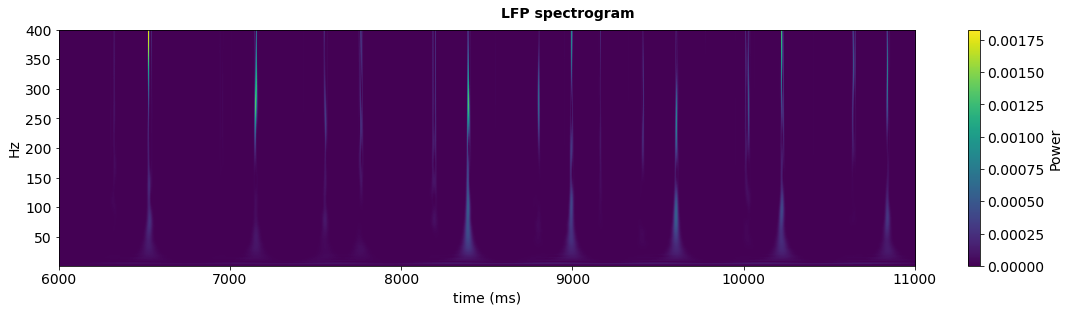

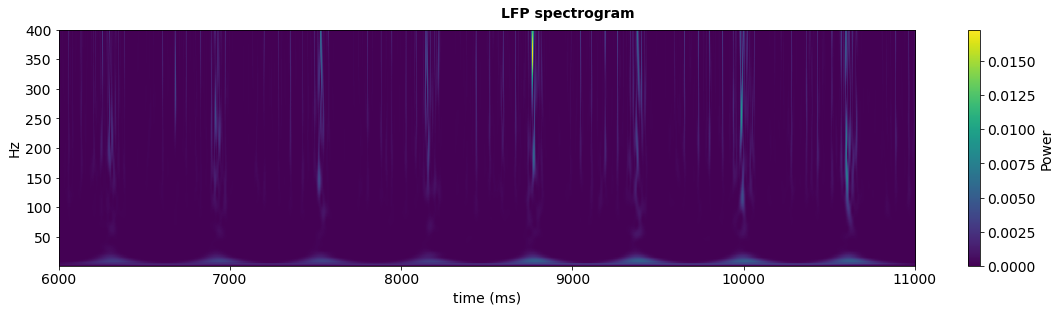

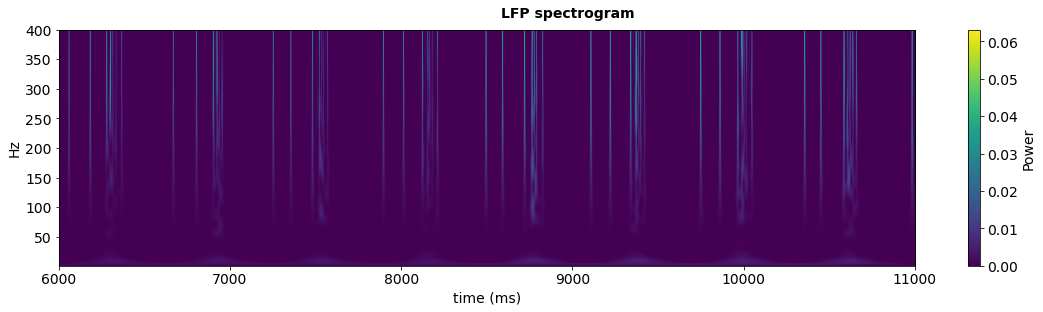

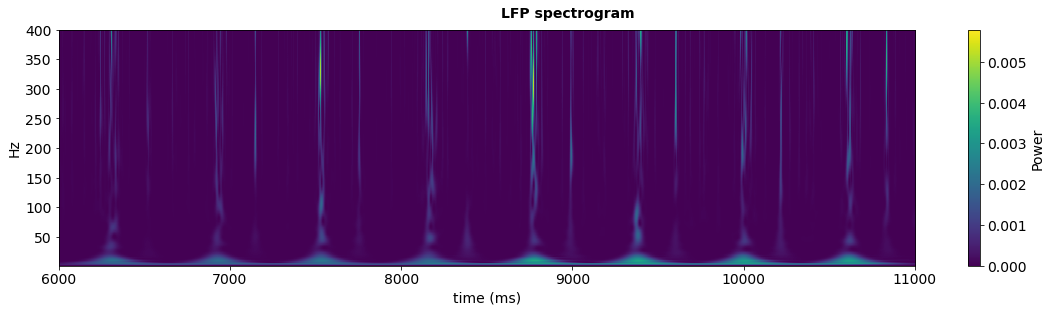

In [10]:
sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': [0], 'timeRange': [6000,11000], 'maxFreq': 400, 'figSize': (16,4), 
                        'saveData': False, 'saveFig': True, 'showFig': False});
sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': [1], 'timeRange': [6000,11000], 'maxFreq': 400, 'figSize': (16,4), 
                        'saveData': False, 'saveFig': True, 'showFig': False});
sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': [2], 'timeRange': [6000,11000], 'maxFreq': 400, 'figSize': (16,4), 
                        'saveData': False, 'saveFig': True, 'showFig': False});
sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': [3], 'timeRange': [6000,11000], 'maxFreq': 400, 'figSize': (16,4), 
                        'saveData': False, 'saveFig': True, 'showFig': False});

In [11]:
# sim.plotting.plotSpikeHist(include=[S1cells],timeRange = timeRange, binSize = 10, density = True, legend = False)

In [12]:
import numpy as np

In [13]:
np.shape(sim.allSimData['LFP'])

(110000, 4)

## Solved the errors in saved LFP file

(-0.5, 0.1)

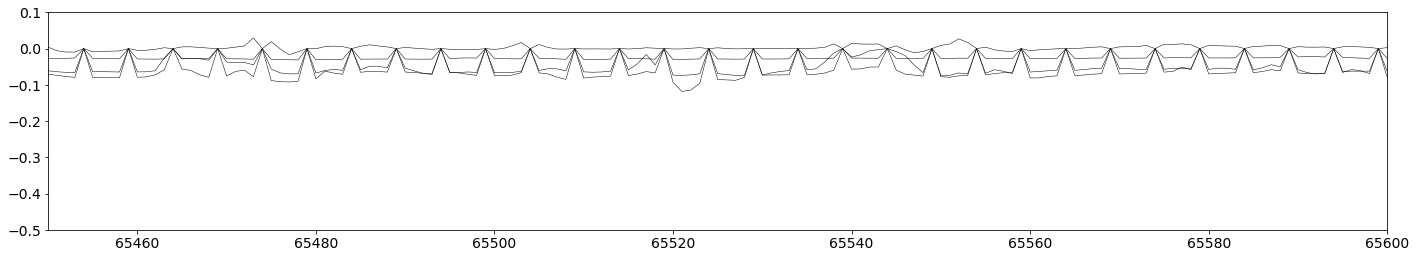

In [14]:
# np.shape(spikesData['simData']['LFP'])
plt.figure(figsize=(24,4))
fontSize = 12
lw = 1

plt.plot(spikesData['simData']['LFP'], 'k-', linewidth=0.5, label='input')
plt.xlim(65450,65600)
plt.ylim(-0.5,0.1)

In [15]:
V = {}
for el in range(4):
    V[el] = []
Vm = []

for t in range(60000,110000):
    vmt = 0
    for el in range(4):
        if abs(sim.allSimData['LFP'][t][el]) < 0.001:
            xt = (sim.allSimData['LFP'][t-1][el]+sim.allSimData['LFP'][t+1][el])/2.0
            V[el].append(xt)            
            if el >= 1:
                vmt += xt/3
        else:
            V[el].append(sim.allSimData['LFP'][t][el])            
            if el >= 1:
                vmt += sim.allSimData['LFP'][t][el]/3
    Vm.append(vmt)

In [16]:
timeRange = [6000, 11000]
recordStep = 0.1
t = np.arange(timeRange[0], timeRange[1], recordStep) 

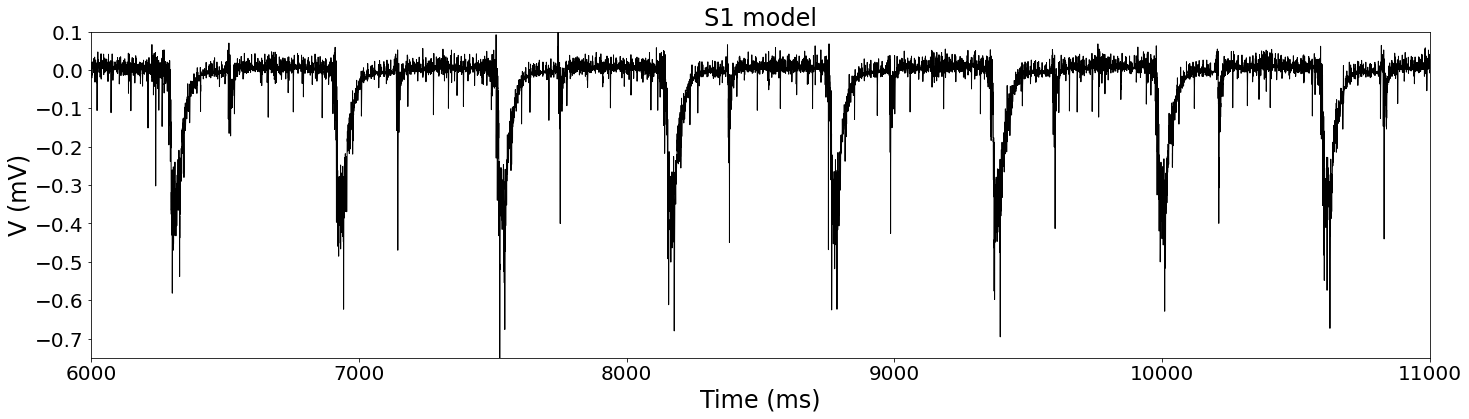

In [64]:
plt.figure(figsize=(24,6))
fontSize = 24
lw = 1

plt.title('S1 model', fontsize=24)
for el in range(3,4):
#     plt.subplot(4, 1, el+1-6)
    plt.plot(t,V[el],'k', linewidth=lw) #, color=color)
# plt.plot(t,Vm,'b-', linewidth=2.5*lw) #, color=color)
plt.xlim(6000,11000)
plt.ylabel('V (mV)', fontsize=fontSize)
plt.ylim(-0.75,0.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Time (ms)', fontsize=fontSize)
plt.show()

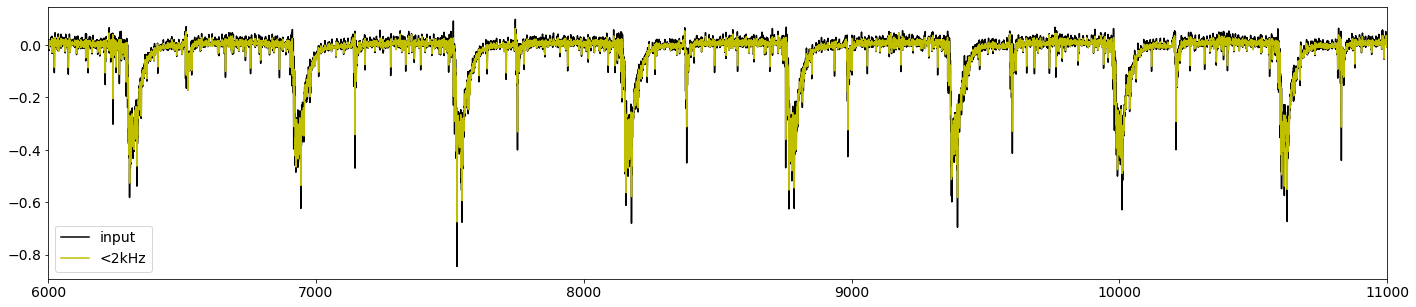

In [42]:
# Now create a lowpass Butterworth filter with a cutoff of 0.2 times the Nyquist frequency, or 2000 Hz, and apply it to x with filtfilt
plt.figure(figsize=(24,5))
fontSize = 12
lw = 1

fs = 1000/recordStep
x = V[3]

b, a = ss.butter(4, 0.200)
y = ss.filtfilt(b, a, x, padlen=100)
plt.plot(t,x, 'k-', linewidth=1.5, label='input')
plt.plot(t,y, 'y-', linewidth=1.5, label='<2kHz')

# b, a = ss.ellip(4, 0.01, 120, 0.125)  # Filter to be applied.
# fgust = ss.filtfilt(b, a, x, method="gust")
# fpad = ss.filtfilt(b, a, x, padlen=50)
# plt.plot(t,fgust, 'b-', linewidth=0.5, label='gust')
# plt.plot(t,fpad, 'c-', linewidth=0.5, label='pad')
plt.xlim(6000,11000)
plt.legend(loc='best')
plt.show()


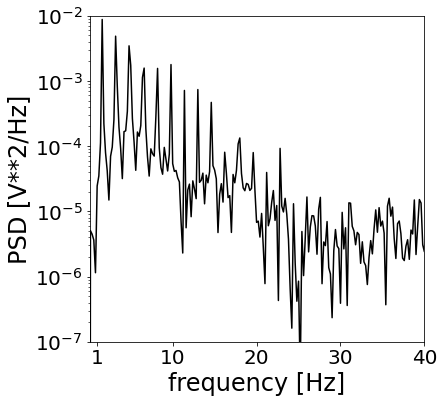

In [61]:
plt.figure(figsize=(6,6))
fontSize = 12

fs = 1000/recordStep

x = V[3]
f, Pxx_den = ss.periodogram(x, fs)
plt.semilogy(f, Pxx_den,'k')

# b, a = ss.butter(4, 0.200)
# y = ss.filtfilt(b, a, x, padlen=100)

# f, Pxx_den = ss.periodogram(y, fs)
# plt.semilogy(f, Pxx_den)


plt.ylim([1e-7, 1e-2])
plt.xlim([0.1, 40])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
plt.xticks([1,10,20, 30,40], fontsize=20);

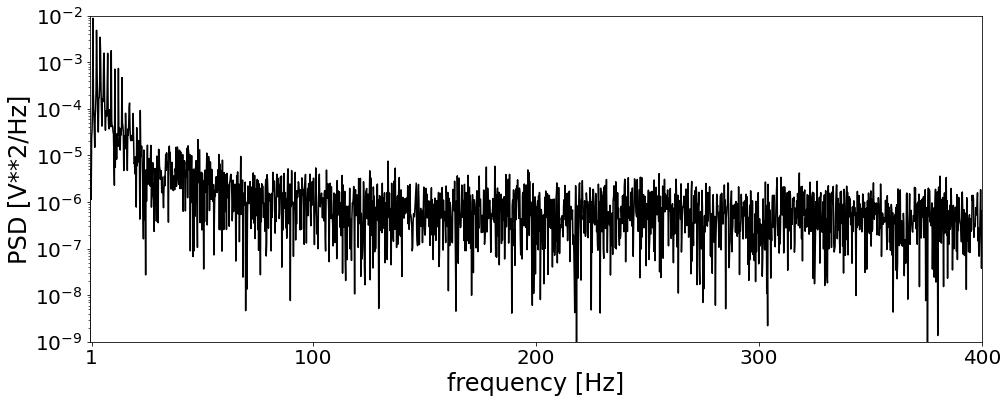

In [62]:
plt.figure(figsize=(16,6))
fontSize = 12

fs = 1000/recordStep

x = V[3]
f, Pxx_den = ss.periodogram(x, fs)
plt.semilogy(f, Pxx_den,'k')

# b, a = ss.butter(4, 0.200)
# y = ss.filtfilt(b, a, x, padlen=100)

# f, Pxx_den = ss.periodogram(y, fs)
# plt.semilogy(f, Pxx_den)


plt.ylim([1e-9, 1e-2])
plt.xlim([0.1, 400])
plt.xlabel('frequency [Hz]', fontsize=24)
plt.ylabel('PSD [V**2/Hz]', fontsize=24)
plt.yticks(fontsize = 20)
plt.xticks([1,100,200, 300,400], fontsize=20);

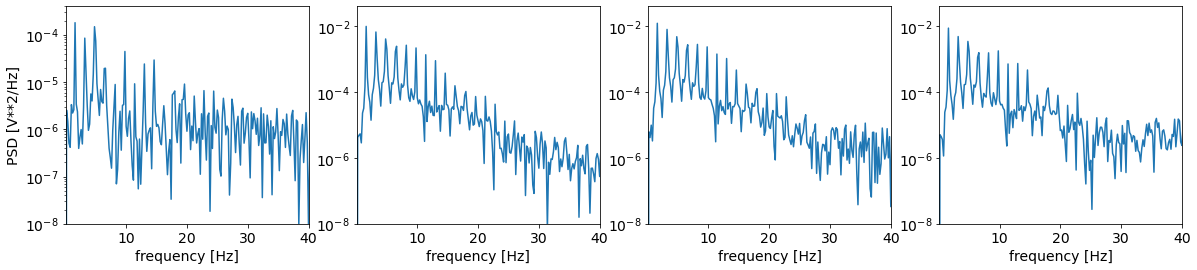

In [33]:
plt.figure(figsize=(20,4))
fontSize = 12

fs = 1000/recordStep

for ii in range(4):
    plt.subplot(1, 4, ii+1)
    x = V[ii]
    b, a = ss.butter(4, 0.200)
    y = ss.filtfilt(b, a, x, padlen=100)
    
    f, Pxx_den = ss.periodogram(y, fs)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-8, 4e-2])
    plt.xlim([0.1, 40])
    plt.xlabel('frequency [Hz]')
    if ii==0:
        plt.ylabel('PSD [V**2/Hz]')
        plt.ylim([1e-8, 4e-4])
    else:
        plt.ylabel('')

plt.show()

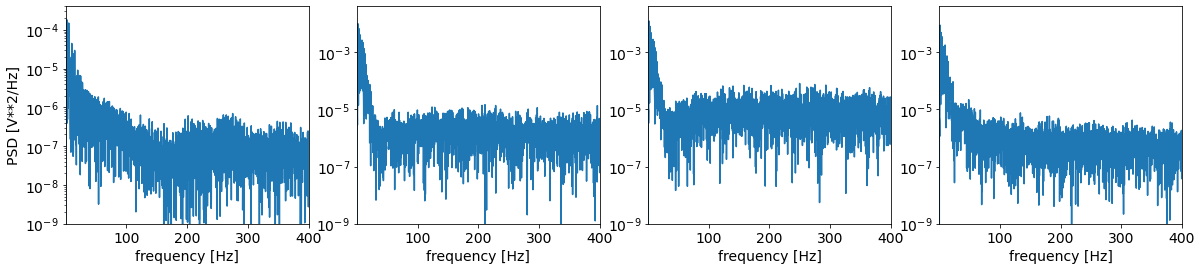

In [21]:
plt.figure(figsize=(20,4))
fontSize = 12

fs = 1000/recordStep

for ii in range(4):
    plt.subplot(1, 4, ii+1)
    x = V[ii]
    b, a = ss.butter(4, 0.200)
    y = ss.filtfilt(b, a, x, padlen=100)
    f, Pxx_den = ss.periodogram(y, fs)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-9, 4e-2])
    plt.xlim([0.2, 400])
    plt.xlabel('frequency [Hz]')
    if ii==0:
        plt.ylabel('PSD [V**2/Hz]')
        plt.ylim([1e-9, 4e-4])
    else:
        plt.ylabel('')

plt.show()

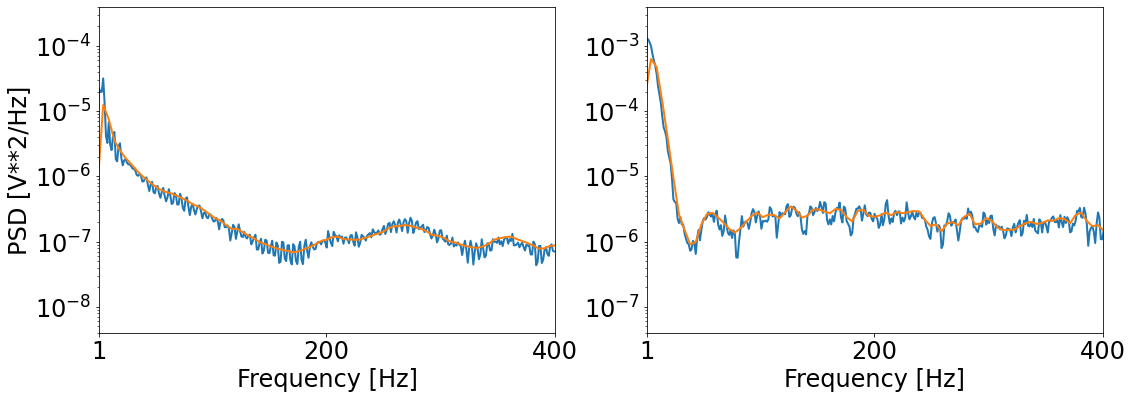

In [22]:
plt.figure(figsize=(18,6))
fontSize = 24
lw = 2

plt.subplot(1, 2, 1)
fs = 1000/recordStep
x = V[0]
f, Pxx_den = ss.welch(x, fs, nperseg=8*1024)
plt.semilogy(f, Pxx_den, linewidth=2)
f, Pxx_den = ss.welch(x, fs, nperseg=4*512)
plt.semilogy(f, Pxx_den, linewidth=2)
plt.ylim(0.4e-8, 4e-4)
plt.xlim(1, 100)
plt.xlabel('Frequency [Hz]', fontsize = fontSize)
plt.ylabel('PSD [V**2/Hz]', fontsize = fontSize)
plt.xticks([1,200,400], fontsize = fontSize)
plt.yticks(fontsize = fontSize)

plt.subplot(1, 2, 2)
fs = 1000/recordStep
x = V[1]
f, Pxx_den = ss.welch(x, fs, nperseg=8*1024)
plt.semilogy(f, Pxx_den, linewidth=2)
f, Pxx_den = ss.welch(x, fs, nperseg=4*512)
plt.semilogy(f, Pxx_den, linewidth=2)
plt.ylim(0.4e-7, 4e-3)
plt.xlim(1, 100)
plt.xlabel('Frequency [Hz]', fontsize = fontSize)
plt.ylabel('', fontsize = fontSize)
plt.xticks([1,200,400], fontsize = fontSize)
plt.yticks(fontsize = fontSize)

plt.show()

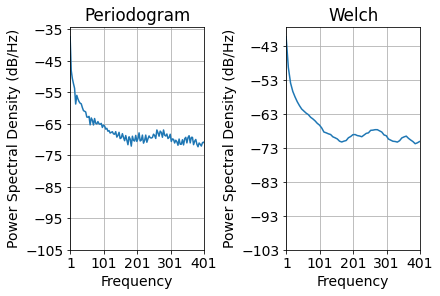

In [23]:
import matplotlib.mlab as mlab

fs = 10000
x = V[0]

fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
xticks = np.arange(1, 402, 100)
xrange = (xticks[0], xticks[-1])


ax0.psd(x, NFFT=3001, Fs=fs, window=mlab.window_none,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_xticks(xticks)
ax0.set_xlim(xrange)

ax1.psd(x, NFFT=1500, Fs=fs, window=mlab.window_none, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_xlim(xrange)

plt.show()

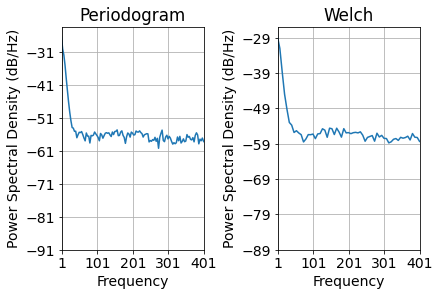

In [24]:
import matplotlib.mlab as mlab

fs = 10000
x = V[1]

fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
xticks = np.arange(1, 402, 100)
xrange = (xticks[0], xticks[-1])


ax0.psd(x, NFFT=3001, Fs=fs, window=mlab.window_none,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_xticks(xticks)
ax0.set_xlim(xrange)

ax1.psd(x, NFFT=1500, Fs=fs, window=mlab.window_none, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_xlim(xrange)

plt.show()